In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [2]:
df = pd.read_csv('./input/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [3]:
df1 = df.copy()

In [4]:
for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100
    if null_rate > 0:
        print(f'{i} null_rate: {round(null_rate, 2)}%')

director null_rate: 30.68%
cast null_rate: 9.22%
country null_rate: 6.51%
date_added null_rate: 0.13%
rating null_rate: 0.09%


In [5]:
df['date_added'] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

In [6]:
df['season_count'] = df.apply(lambda x: x['duration'].split(' ')[0] if 'Season' in x['duration'] else '', axis=1)
df['duration'] = df.apply(lambda x: x['duration'].split(' ')[0] if 'Season' not in x['duration'] else '', axis=1)

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,season_count
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0,8.0,4
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0,12.0,
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018.0,12.0,
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017.0,11.0,
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123,Dramas,A brilliant group of students become card-coun...,2020.0,1.0,


In [7]:
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['cast'].replace(np.nan, 'No data', inplace=True)
df['director'].replace(np.nan, 'No data', inplace=True)
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [8]:
for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100
    if null_rate > 0:
        print(f'{i} null_rate: {round(null_rate,2)}%')
        
print('Wow!, nothing. Wonderfull!')

Wow!, nothing. Wonderfull!


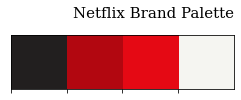

In [10]:
sns.palplot(['#221f1f', '#b20710', '#e50914', '#f5f5f1'])
plt.title('Netflix Brand Palette', loc='right', fontfamily='serif', fontsize=15, y=1.2)
plt.show()

In [ ]:
col = 'type'
grouped = df[col].value_counts().reset_index()
grouped = grouped.rename(columns= {col: 'count', 'index':col})